In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

## Load Data

In [2]:
data_path = r'data/Loan/loan-10k.lrn.csv'
df = pd.read_csv(data_path)
print(df.loc[[0]])

      ID  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  24341    12500.0      12500.0          12500.0   36 months      7.21   

   installment emp_length home_ownership  annual_inc  ...  \
0       387.17   < 1 year       MORTGAGE     81000.0  ...   

  debt_settlement_flag issue_d_month issue_d_year earliest_cr_line_month  \
0                    N             6         2018                      6   

  earliest_cr_line_year  last_pymnt_d_month  last_pymnt_d_year  \
0                  2000                   2               2019   

   last_credit_pull_d_month  last_credit_pull_d_year  grade  
0                         2                     2019      A  

[1 rows x 92 columns]


## 2. Exploration

In [3]:
# df = df.set_index("ID")
df.describe()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,total_bc_limit,total_il_high_credit_limit,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50043.430200,15631.152500,15631.152500,15625.992500,13.216959,461.084183,8.212897e+04,19.089188,0.303400,698.179500,...,2.423097e+04,48294.371800,5.77670,2016.003100,5.724600,2000.017900,4.003000,2017.747300,3.334200,2018.453400
std,28982.440166,9314.246117,9314.246117,9312.426843,4.855838,269.903751,6.769284e+04,9.523219,0.841201,32.170977,...,2.539548e+04,46981.179499,3.40482,1.587496,3.382558,7.302583,3.224257,1.463235,2.909666,0.963494
min,0.000000,1000.000000,1000.000000,1000.000000,5.310000,30.120000,5.000000e+03,0.000000,0.000000,660.000000,...,2.000000e+02,0.000000,0.00000,2012.000000,0.000000,1965.000000,0.000000,2012.000000,0.000000,2012.000000
25%,24873.250000,8350.000000,8350.000000,8343.750000,9.750000,263.770000,5.000000e+04,12.437500,0.000000,675.000000,...,8.800000e+03,18881.250000,3.00000,2015.000000,3.000000,1996.000000,2.000000,2017.000000,2.000000,2018.000000
50%,50033.500000,14000.000000,14000.000000,14000.000000,12.730000,396.780000,7.000000e+04,18.330000,0.000000,690.000000,...,1.710000e+04,36533.500000,6.00000,2016.000000,6.000000,2001.000000,2.000000,2018.000000,2.000000,2019.000000
75%,75261.500000,21000.000000,21000.000000,21000.000000,16.010000,616.337500,9.700000e+04,24.930000,0.000000,715.000000,...,3.140000e+04,63500.500000,9.00000,2017.000000,9.000000,2005.000000,6.000000,2019.000000,3.000000,2019.000000
max,99999.000000,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,3.200000e+06,168.520000,16.000000,845.000000,...,1.090700e+06,768775.000000,11.00000,2018.000000,11.000000,2015.000000,11.000000,2019.000000,11.000000,2019.000000


In [4]:
# display(df.policy_code.describe())
# df.drop("policy_code", axis=1, inplace=True)

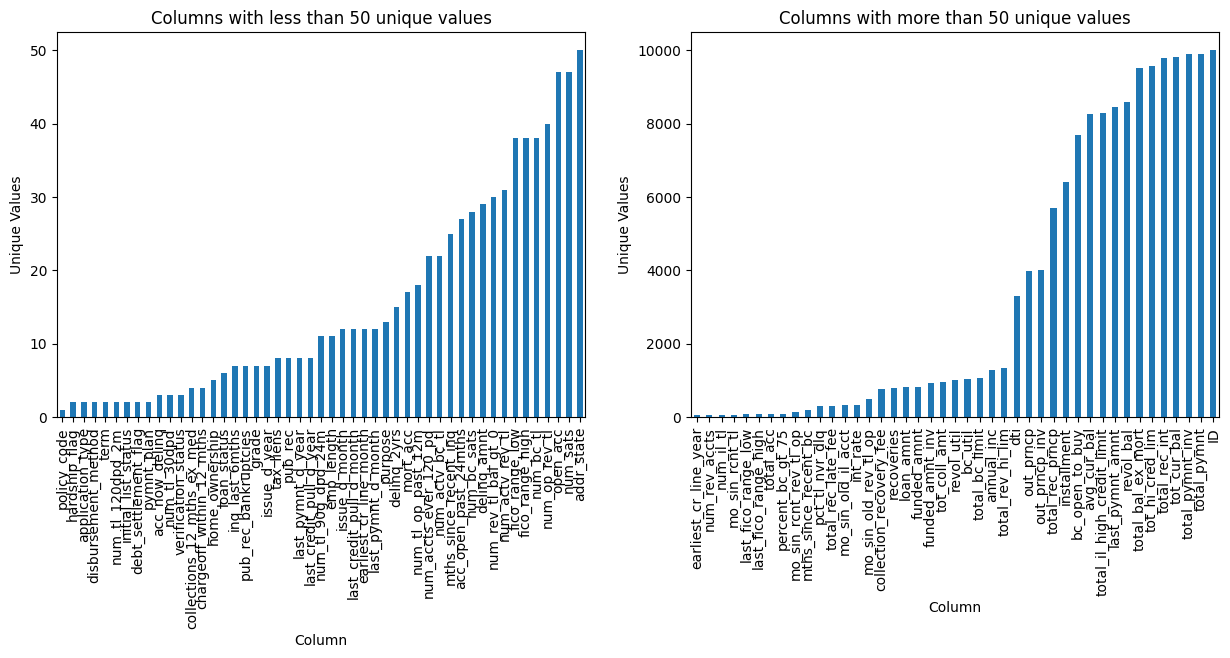

In [5]:
unique_values = df.nunique().sort_values()

less_than_50 = unique_values[unique_values <= 50]
more_than_50 = unique_values[unique_values > 50]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

less_than_50.plot(kind='bar', ax=ax1)
ax1.set_title('Columns with less than 50 unique values')

more_than_50.plot(kind='bar', ax=ax2)
ax2.set_title('Columns with more than 50 unique values')

for ax in [ax1, ax2]:
    ax.set_xlabel('Column')
    ax.set_ylabel('Unique Values')

plt.show()

<Axes: >

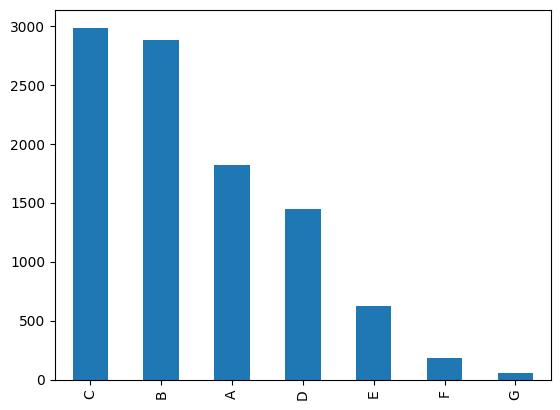

In [6]:
df['grade'].value_counts().plot(kind='bar')

In [7]:
df.select_dtypes(object)

,term,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,grade
0,36 months,< 1 year,MORTGAGE,Not Verified,Current,n,debt_consolidation,IL,w,Individual,N,Cash,N,A
1,60 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,OK,f,Individual,N,Cash,N,E
2,60 months,< 1 year,RENT,Not Verified,Fully Paid,n,debt_consolidation,AZ,w,Individual,N,Cash,N,D
3,36 months,9 years,RENT,Source Verified,Charged Off,n,debt_consolidation,CA,f,Individual,N,Cash,N,C
4,36 months,1 year,MORTGAGE,Source Verified,Current,n,debt_consolidation,FL,w,Individual,N,Cash,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60 months,5 years,OWN,Verified,Current,n,debt_consolidation,NJ,w,Individual,N,Cash,N,C
9996,36 months,10+ years,RENT,Source Verified,Charged Off,n,credit_card,NY,w,Individual,N,Cash,N,B
9997,60 months,< 1 year,RENT,Source Verified,Current,n,debt_consolidation,OR,w,Individual,N,Cash,N,C
9998,60 months,1 year,RENT,Source Verified,Charged Off,n,medical,CA,w,Individual,N,Cash,N,D


<Axes: xlabel='int_rate', ylabel='grade'>

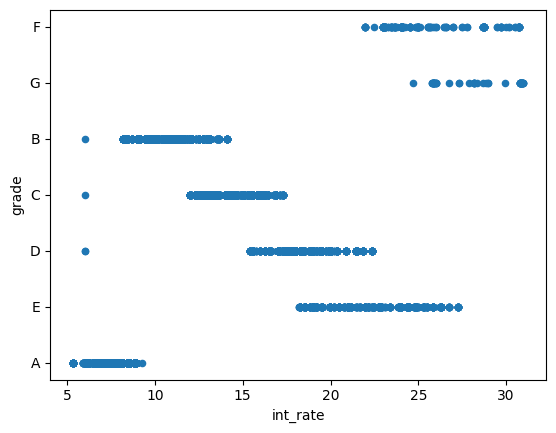

In [8]:
df.plot.scatter(x='int_rate', y ='grade')

In [9]:
# df_loc.hist(bins=30, figsize=(150,100))

In [10]:
# for c in df_loc.columns:
#     df_loc.plot.scatter(x=c, y ='grade')
# # df_loc = df_loc[df_loc.int_rate != 6.0]
# # df_loc.plot.scatter(x='int_rate', y ='grade')

In [11]:
#dti, last_fico_range_low have outliers but dont seem to be relevant features

# df_loc.plot.scatter(x='dti', y ='grade')
# plt.show()
# df_loc['dti'].hist()
# plt.show()
# df_loc['last_fico_range_low'].hist()
# plt.show()
# df_loc.plot.scatter(x='last_fico_range_low', y ='grade')

In [12]:
# from scipy.stats import zscore
# z = df_loc.apply(zscore)
# z = np.abs(z)
# z.max()[z.max()>50]
# df_loc['home_ownership_ANY'].hist()
df

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,...,N,8,2017,11,1991,2,2019,2,2019,C
9996,25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,...,N,10,2014,4,2004,3,2017,6,2018,B
9997,95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,...,N,4,2017,2,2004,2,2019,2,2019,C
9998,27371,11000.0,11000.0,11000.0,60 months,16.29,269.20,1 year,RENT,38500.0,...,N,9,2014,8,2006,3,2016,10,2016,D


In [13]:
from sklearn.model_selection import train_test_split
     

In [14]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder

def calculate_month_difference(month, year):
    target_month = 0  # January
    target_year = 2023

    total_months = (target_year - year) * 12  # Calculate the total months based on the difference in years
    total_months += target_month - month  # Add the remaining months from the target month

    return abs(total_months)

def transform_encode(X_te, X_tr, enc_type):
    log_features = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
    c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                                'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                                'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']

    months = []
        
    if enc_type == 'one_hot':
        preprocessor = ColumnTransformer([
            ('log', FunctionTransformer(np.log), log_features),
            ('c_root', FunctionTransformer(np.cbrt), c_root_tranform_col),
            ('one_hot', OneHotEncoder(handle_unknown = 'ignore'), list(X_tr.select_dtypes('object').columns)+months)])
    elif enc_type in ['mix', 'loc']:
        for x in [X_te, X_tr]:
            x['emp_length'].replace({ '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,    
                '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
            x['loan_status'].replace({'Charged Off': 0, 'Current': 1,'Fully Paid': 2, 'In Grace Period': 3,  
                'Late (16-30 days)': 4, 'Late (31-120 days)': 5}, inplace=True) #TODO check if removed from loan status dtype not object anymore
            if enc_type == 'loc':
                data_path_loc = r'data/Loan/states.csv'
                loc = pd.read_csv(data_path_loc, sep='\t')
                loc.columns
                loc = loc.drop('name', axis=1)
                x = pd.merge(x, loc, on="addr_state")
                x = x.drop('addr_state', axis=1)    
        preprocessor = ColumnTransformer([
            ('log', FunctionTransformer(np.log), log_features),
            ('c_root', FunctionTransformer(np.cbrt), c_root_tranform_col),
            ('one_hot', OneHotEncoder(handle_unknown = 'ignore'), list(X_tr.select_dtypes('object').columns) + months)])
    elif enc_type == 'label':
        preprocessor = ColumnTransformer([
            ('log', FunctionTransformer(np.log), log_features),
            ('c_root', FunctionTransformer(np.cbrt), c_root_tranform_col),
            ('label', LabelEncoder(), list(X_tr.select_dtypes('object').columns))])
    else:
        print("ERROR n valid enc_type")
    return X_te, X_tr, preprocessor

# df = df[df.int_rate != 6.0] TODO outlier

# # label encode grade TODO
# if 'grade' in df:
#     df['grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,}, inplace=True)




In [15]:
def train_test(X, y, kaggle):
    if kaggle:
        X_tr = X.copy()
        y_tr = y.copy()
        X_te = pd.read_csv('data/Loan/loan-10k.tes.csv')
        X_te_id = X_te.pop('ID')
        X_tr_id = X_tr.pop('ID')
        return X_tr, X_te, y_tr, None, X_te_id, X_tr_id
    else:
        X_tr, X_te, y_tr, y_te = train_test_split(X,y, random_state=42, stratify=y, test_size=0.2)
        X_te_id = X_te.pop('ID')
        X_tr_id = X_tr.pop('ID')
        return X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id

In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, OrdinalEncoder

def encode_data(X_tr, X_te, how):
    col = list(X_tr.select_dtypes('object').columns)
    if how == 'label':
        enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_tr[col] = enc.fit_transform(X_tr[col])
        X_te[col] = enc.transform(X_te[col])
    if how =='one_hot':
        enc = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='error')
        encoded_array = enc.fit_transform(X_tr.loc[:,col])
        X_tr_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
        X_tr = X_tr.assign(row_number=range(len(X_tr)))
        X_tr_encoded = X_tr_encoded.assign(row_number=range(len(X_tr_encoded)))
        X_tr_sklearn_encoded = pd.merge(X_tr, X_tr_encoded, on='row_number')
        X_tr_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_tr = X_tr_sklearn_encoded

        encoded_array = enc.transform(X_te.loc[:,col])
        X_te_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out())
        X_te = X_te.assign(row_number=range(len(X_te)))
        X_te_encoded = X_te_encoded.assign(row_number=range(len(X_te_encoded)))
        X_te_sklearn_encoded = pd.merge(X_te, X_te_encoded, on='row_number')
        X_te_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_te = X_te_sklearn_encoded
    if how == 'mix':
        for x in [X_tr, X_te]:
            x['emp_length'].replace({ '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,    
                '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}, inplace=True)
            x['loan_status'].replace({'Charged Off': 0, 'Current': 1,'Fully Paid': 2, 'In Grace Period': 3,  
                'Late (16-30 days)': 4, 'Late (31-120 days)': 5, 'Default': -1}, inplace=True)
            x.drop(labels=['addr_state'], axis=1, inplace=True)
        col = list(X_tr.select_dtypes('object').columns)

        enc = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
        encoded_array = enc.fit_transform(X_tr.loc[:,col])
        X_tr_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
        X_tr = X_tr.assign(row_number=range(len(X_tr)))
        X_tr_encoded = X_tr_encoded.assign(row_number=range(len(X_tr_encoded)))
        X_tr_sklearn_encoded = pd.merge(X_tr, X_tr_encoded, on='row_number')
        X_tr_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_tr = X_tr_sklearn_encoded

        encoded_array = enc.transform(X_te.loc[:,col])
        X_te_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out())
        X_te = X_te.assign(row_number=range(len(X_te)))
        X_te_encoded = X_te_encoded.assign(row_number=range(len(X_te_encoded)))
        X_te_sklearn_encoded = pd.merge(X_te, X_te_encoded, on='row_number')
        X_te_sklearn_encoded.drop(labels= col+['row_number'],axis=1,inplace=True)
        X_te = X_te_sklearn_encoded
    return X_tr, X_te

In [17]:
def transformer(X_tr, X_te):
        log_tranform_col = ['int_rate', 'annual_inc', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit']
        c_root_tranform_col = ['installment', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                            'total_il_high_credit_limit', 'total_bal_ex_mort', 'avg_cur_bal', 'bc_open_to_buy', 
                            'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt','tot_cur_bal']

        for col in c_root_tranform_col:
            X_tr[col] = np.cbrt(X_tr[col])
            X_te[col] = np.cbrt(X_te[col])
        for col in log_tranform_col:
            X_tr[col] = np.log(X_tr[col])
            X_te[col] = np.log(X_te[col])
        return X_tr, X_te

In [18]:
from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, OrdinalEncoder
from copy import deepcopy
from utils import classification_util as cu

In [22]:
data = df.copy()

# data = data[data.int_rate != 6.0]

y = data.pop('grade')
X = data

kaggle = False
encoding = 'label'
scaling = False
oversampling = True
transform = False

X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id = train_test(X, y, kaggle)

if transform:
    X_tr, X_te = transformer(X_tr, X_te)
X_tr, X_te = encode_data(X_tr, X_te, encoding)

preprocessing_steps = []
if scaling:
    scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

if oversampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    X_tr, y_tr = ros.fit_resample(X_tr, y_tr)

methods = [ 
    ('KNN', neighbors.KNeighborsClassifier()), 
    ('DT', DecisionTreeClassifier())]#,#, #criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2
    #('MLPerceptron', neural_network.MLPClassifier())]

pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    pipeline_steps.append(method)
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []

for pipeline in pipelines.values():
    pipeline
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    # display(metrics.accuracy_score(y_te, y_pred))
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)


array([[185,  74,  44,  30,  22,   8,   1],
       [182, 134,  93,  93,  55,  17,   2],
       [136, 137, 112, 101,  76,  28,   8],
       [ 53,  58,  53,  58,  56,  10,   2],
       [ 24,  30,  23,  21,  16,  10,   0],
       [  5,   5,   4,   8,  11,   3,   1],
       [  1,   1,   1,   0,   6,   2,   0]])

(0.17877217083445784, 0.19118356516798712, 0.17535852252992484, None)

0.254

array([[360,   4,   0,   0,   0,   0,   0],
       [  1, 575,   0,   0,   0,   0,   0],
       [  0,   2, 596,   0,   0,   0,   0],
       [  0,   0,   1, 284,   5,   0,   0],
       [  0,   0,   0,   9, 109,   6,   0],
       [  0,   0,   0,   0,   5,  31,   1],
       [  0,   0,   0,   0,   0,   3,   8]])

(0.9334809149343241, 0.9153405091853134, 0.9230182881635189, None)

0.9815

In [25]:
models = {}

In [27]:
from utils import classification_util as cu

knn_params = {'KNN__n_neighbors' : [2, 5, 10, 25, 50], 
              'KNN__weights' : ['distance'],
              'KNN__p' : [1, 2]
             }
models['KNN'] = cu.perform_gridsearch(X_tr, y_tr, X_te, y_te, pipelines['KNN'], knn_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   2.7s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   2.7s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   2.8s
[CV] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; total time=   0.4s
[CV] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; total time=   0.5s
[CV] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; total time=   0.5s
[CV] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; total time=   0.5s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   2.5s
[CV] END KNN__n_neighbors=2, KNN__p=2, KNN__weights=distance; total time=   0.5s
[CV] END KNN__n_neighbors=2, KNN__p=1, KNN__weights=distance; total time=   2.6s
[CV] END KNN__n_neighbors=5, KNN__p=1, KNN__weights=distance; total time=   2.6s
[CV] END KNN__n_neighbors=5, KNN__p=1, KNN__weig

{'KNN__n_neighbors': 2, 'KNN__p': 1, 'KNN__weights': 'distance'}

array([[0.31868132, 0.35989011, 0.23351648, 0.06318681, 0.01373626,
        0.00824176, 0.00274725],
       [0.203125  , 0.33159722, 0.29513889, 0.125     , 0.03819444,
        0.00520833, 0.00173611],
       [0.13377926, 0.31270903, 0.31605351, 0.17725753, 0.03846154,
        0.01505017, 0.00668896],
       [0.1       , 0.25862069, 0.31034483, 0.19310345, 0.1137931 ,
        0.02413793, 0.        ],
       [0.08870968, 0.26612903, 0.34677419, 0.14516129, 0.11290323,
        0.04032258, 0.        ],
       [0.05405405, 0.35135135, 0.24324324, 0.2972973 , 0.05405405,
        0.        , 0.        ],
       [0.09090909, 0.36363636, 0.18181818, 0.09090909, 0.18181818,
        0.09090909, 0.        ]])

acc: 0.283
balanced_acc: 0.18176267524164857
prfs: (0.1831812729023475, 0.18176267524164857, 0.18217071135116888, None)



In [26]:
print(models)

{}


In [39]:

from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, OrdinalEncoder
from copy import deepcopy

kaggle = False

months_oh = True
enc_type = 'loc'

do_scaling = False
do_resampling = False

df =df.copy()
y = df.pop('grade')
X = df

col = list(X.select_dtypes('object').columns)

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[col] = enc.fit_transform(X[col])
# kfeatures[col] = enc.transform(kfeatures[col])


X_tr, X_te, y_tr, y_te, X_te_id, X_tr_id = train_test(X, y, kaggle=kaggle)
# X_te, X_tr, transform_encoder = transform_encode(X_te, X_tr, months_oh, enc_type)


if do_resampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    X_tr, y_tr = ros.fit_resample(X_tr, y_tr)

# preprocessing_steps = [('transform_encoder', transform_encoder)]
preprocessing_steps = []
if do_scaling:
    if enc_type in ['one_hot', 'loc']:
        scaler = preprocessing.StandardScaler(with_mean=False)
    else:
        scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

methods = [ 
    ('KNN', neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', p=1, algorithm='auto')), 
    ('DT', DecisionTreeClassifier())]#, #criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2
    # ('RandomForests', ensemble.RandomForestClassifier(class_weight="balanced_subsample", max_depth=30, min_samples_split=3, n_estimators=400)),#, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 8, n_estimators= 1000)), 
    # ('MLPerceptron', neural_network.MLPClassifier(hidden_layer_sizes=(50,50)))]

pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    pipeline_steps.append(method)
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []

for pipeline in pipelines.values():
    pipeline
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    # display(metrics.accuracy_score(y_te, y_pred))
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)
    print(y_pred)


array([[129, 137,  87,  11,   0,   0,   0],
       [118, 225, 184,  40,   8,   1,   0],
       [ 71, 209, 221,  79,  14,   4,   0],
       [ 27,  86,  96,  64,  15,   2,   0],
       [ 14,  37,  43,  23,   4,   2,   1],
       [  1,   9,  14,   9,   4,   0,   0],
       [  0,   4,   4,   0,   2,   1,   0]])

(0.19791365003458625, 0.19536193449649306, 0.19377005229949842, None)

0.3215

['B' 'B' 'B' ... 'B' 'C' 'C']


array([[358,   4,   2,   0,   0,   0,   0],
       [  1, 575,   0,   0,   0,   0,   0],
       [  0,   3, 595,   0,   0,   0,   0],
       [  0,   0,   1, 284,   5,   0,   0],
       [  0,   0,   0,   5, 115,   4,   0],
       [  0,   0,   0,   0,   6,  29,   2],
       [  0,   0,   0,   0,   0,   3,   8]])

(0.9258747430077697, 0.9135071229600219, 0.9194028529484956, None)

0.982

['B' 'C' 'B' ... 'B' 'C' 'B']


In [68]:
pipelines['DT']

Pipeline(steps=[('transform_encoder',
                 ColumnTransformer(transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['int_rate', 'annual_inc',
                                                   'total_rev_hi_lim',
                                                   'tot_hi_cred_lim',
                                                   'total_bc_limit']),
                                                 ('c_root',
                                                  FunctionTransformer(func=<ufunc 'cbrt'>),
                                                  ['installment', 'total_acc',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'total_il_high_credit_limit...
                                                   'revol_bal', 'total_rec_int',
                                                   'last_pymnt_amnt',
                                                   'tot_coll_amt',
                                                   'tot_cur_bal']),
                                                 ('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['term', 'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'loan_status', 'pymnt_plan',
                                                   'purpose', 'addr_state',
                                                   'initial_list_status',
                                                   'application_type',
                                                   'hardship_flag',
                                                   'disbursement_method',
                                                   'debt_settlement_flag'])])),
                ('DT', DecisionTreeClassifier())])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,addr_state_WV,addr_state_WY,term_ 60 months,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,grade
ID,,,,,,,,,,,,,,,,,,,,,
24341,12500.0,12500.0,12500.0,1.975469,7.288429,11.302204,25.33,0.0,715.0,719.0,...,0,0,0,0,1,0,0,0,0,0
67534,33850.0,33850.0,33775.0,3.044046,9.710252,11.289782,36.72,0.0,670.0,674.0,...,0,0,1,0,0,0,0,0,0,4
35080,10000.0,10000.0,10000.0,2.995732,6.422673,10.507257,6.43,0.0,665.0,669.0,...,0,0,1,0,1,0,0,0,0,3
4828,20250.0,20250.0,20250.0,2.660959,8.858486,10.793434,24.08,0.0,665.0,669.0,...,0,0,0,0,0,0,0,0,0,2
59259,25000.0,25000.0,25000.0,2.707383,9.533657,11.350407,22.79,0.0,675.0,679.0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,20000.0,20000.0,20000.0,2.773838,7.865351,10.896739,16.56,0.0,685.0,689.0,...,0,0,1,0,1,0,0,0,0,2
25910,7500.0,7500.0,7500.0,2.250239,6.216363,10.744753,18.01,0.0,705.0,709.0,...,0,0,0,0,1,0,0,0,0,1
95698,20750.0,20750.0,20750.0,2.711378,7.906143,12.128111,13.40,1.0,680.0,684.0,...,0,0,1,0,1,0,0,0,0,2


<Axes: >

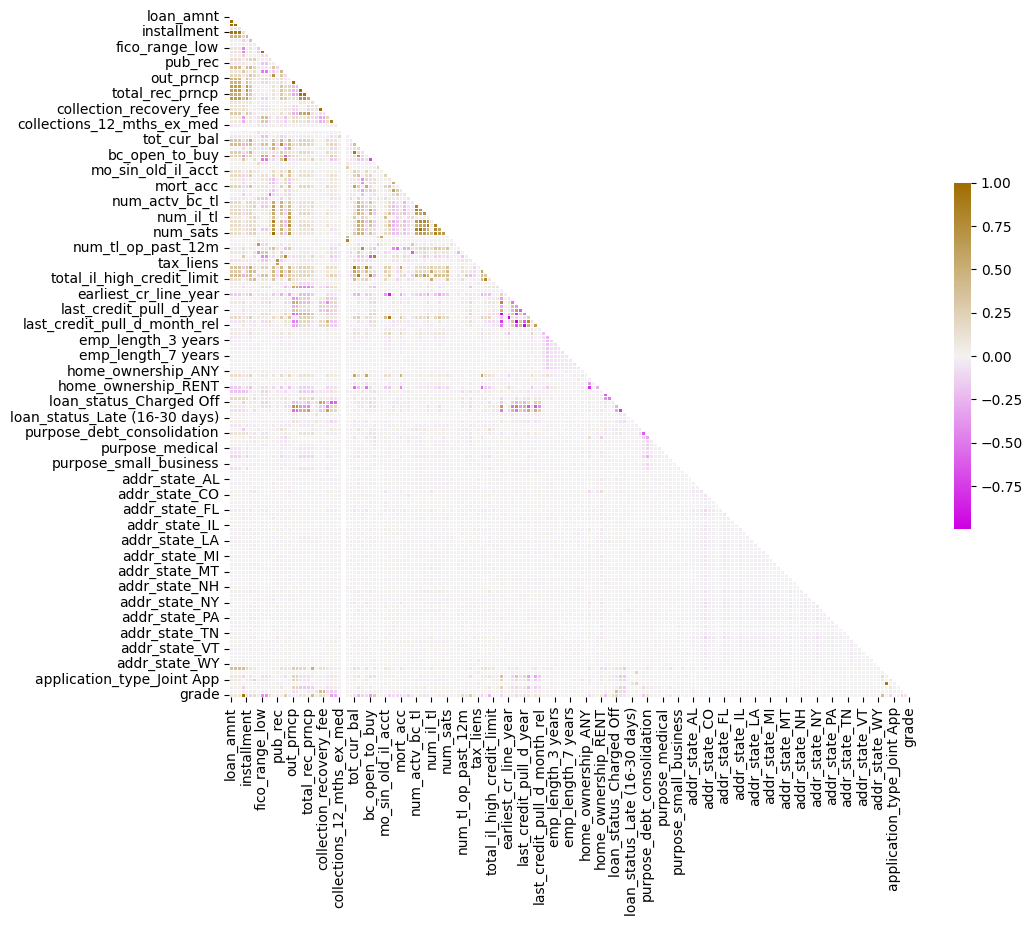

In [76]:
X, y = (X_tr, y_tr)
df_corr = pd.concat([X, y], axis=1)
display(df_corr)
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 50, s=100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# # The pipeline can be used as any other estimator
# # and avoids leaking the test set into the train set
# pipe.fit(X_train, y_train)

# pipe.score(X_test, y_test)

In [61]:

from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from copy import deepcopy

do_scaling = False
do_resampling = False

X_tr, X_te, y_tr, y_te = preprocess_dataframes(df.copy(), train_test=True, enc_type='loc', month_label=True, do_transforms=True)
if do_resampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    X_tr, y_tr = ros.fit_resample(X_tr, y_tr)




preprocessing_steps = []
if do_scaling:
    scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

methods = [ 
    ('KNN', neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', p=1, algorithm='auto')), 
    ('DT', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2))]
    # ('RandomForests', ensemble.RandomForestClassifier(class_weight="balanced_subsample", max_depth=30, min_samples_split=3, n_estimators=400)),#, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 8, n_estimators= 1000)), 
    #('MLPerceptron', neural_network.MLPClassifier(hidden_layer_sizes=(100,200,200,300,300,200,200,200,100)))]

pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    # pipeline_steps.append(('pca', PCA()))
    pipeline_steps.append(method)
    
    pipeline_steps
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []

for pipeline in pipelines.values():
    pipeline
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    # display(metrics.accuracy_score(y_te, y_pred))
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)

NameError: name 'preprocess_dataframes' is not defined

In [84]:

from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from copy import deepcopy

do_scaling = True
do_resampling = True

X_tr, y_tr = preprocess_dataframes(df.copy(), train_test=False, enc_type='loc', month_label=True, do_transforms=True)
if do_resampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    X_tr, y_tr = ros.fit_resample(X_tr, y_tr)


preprocessing_steps = []
if do_scaling:
    scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

methods = [ 
    ('DT', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2))]


pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    # pipeline_steps.append(('pca', PCA()))
    pipeline_steps.append(method)
    
    pipeline_steps
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []


X_te = pd.read_csv('data/Loan/loan-10k.tes.csv')
X_te = preprocess_dataframes(X_te.copy(), train_test=False, enc_type='loc', month_label=True, do_transforms=True)
display(X_te)

for pipeline in pipelines.values():
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    # display(metrics.accuracy_score(y_te, y_pred))
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)

,ID,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,3582,10000.0,10000.0,10000.0,2.295560,6.856606,0,11.775290,6.43,0.0,...,0,0,0,0,0,1,0,0,0,0
1,84261,28000.0,28000.0,28000.0,2.244956,8.374108,3,11.002100,14.82,0.0,...,0,0,0,1,0,1,0,0,0,0
2,29876,10000.0,10000.0,10000.0,2.078191,6.791974,10,12.388394,29.35,0.0,...,0,0,0,0,0,1,0,0,0,0
3,8350,24500.0,24500.0,24425.0,2.747912,8.390664,10,11.289782,22.71,0.0,...,0,0,0,1,0,0,0,0,0,0
4,90049,14000.0,14000.0,13975.0,2.135349,7.615630,10,11.002100,18.77,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,72628,14475.0,14475.0,14475.0,2.127041,7.698184,10,11.141862,33.53,0.0,...,0,0,0,0,0,1,0,0,0,0
9995,28654,2000.0,2000.0,2000.0,2.437116,4.039198,10,10.970987,27.05,0.0,...,0,0,0,0,0,1,0,0,0,0
9996,42931,13425.0,13425.0,13400.0,3.188004,7.294197,2,10.373491,24.94,0.0,...,0,0,0,1,0,0,0,0,0,0
9997,59985,2000.0,2000.0,2000.0,2.484073,4.049794,0,10.491274,13.87,0.0,...,0,0,0,0,0,1,0,0,0,0


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ID
- home_ownership_NONE
- loan_status_0
- loan_status_1
- loan_status_2
- ...
Feature names seen at fit time, yet now missing:
- home_ownership_OTHER
- loan_status


In [61]:
def perform_gridsearch(pipe, params):
    gr_search = model_selection.GridSearchCV(pipe, param_grid=params, scoring='f1_macro', cv=5, verbose=2, n_jobs=3)
    gr_search.fit(X_tr, y_tr)
    best_params = gr_search.best_params_
    best_score = gr_search.best_score_

    best_model = gr_search.best_estimator_
    y_pred = best_model.predict(X_te)
    display(best_params)
    display(best_score)

    display((metrics.confusion_matrix(y_te, y_pred), metrics.accuracy_score(y_te, y_pred), metrics.balanced_accuracy_score(y_te, y_pred), metrics.precision_recall_fscore_support(y_te, y_pred)))

In [62]:
param_grid = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 5, 10, 20],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 4]
}

perform_gridsearch(pipelines['DT'], param_grid)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.4s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.3s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.4s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.3s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.4s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.3s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.3s
[CV] END DT__criterion=gini, DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=5; total time=   0.3s
[C

KeyboardInterrupt: 

In [ ]:
display(pipelines)

{'KNN': Pipeline(steps=[('standard_scaling', StandardScaler()),
                 ('KNN',
                  KNeighborsClassifier(n_neighbors=10, weights='distance'))]),
 'RandomForests': Pipeline(steps=[('standard_scaling', StandardScaler()),
                 ('RandomForests',
                  RandomForestClassifier(class_weight='balanced_subsample'))]),
 'MLPerceptron': Pipeline(steps=[('standard_scaling', StandardScaler()),
                 ('MLPerceptron', MLPClassifier())])}

In [ ]:
knn_params = {'KNN__n_neighbors': [5, 10, 25, 50, 100], 
              'KNN__weights': ['uniform', 'distance'],
              'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'KNN__p': [1, 2],
             }

perform_gridsearch(pipelines['KNN'], knn_params)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=uniform; total time=   3.8s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=uniform; total time=   3.9s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=uniform; total time=   4.1s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=uniform; total time=   3.6s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=distance; total time=   3.4s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=uniform; total time=   3.9s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=distance; total time=   3.6s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=distance; total time=   3.7s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__p=1, KNN__weights=distance; total time=   3.9s
[CV] END KNN__algorithm=a

{'KNN__algorithm': 'auto',
 'KNN__n_neighbors': 5,
 'KNN__p': 2,
 'KNN__weights': 'distance'}

0.7460468158472081

(array([[300, 108,  25,  12,  10,   0,   0],
        [207, 256, 130,  89,  33,   4,   1],
        [ 72, 186, 220, 153,  85,  23,   8],
        [ 11,  52, 120,  95,  56,  20,   8],
        [  2,  13,  33,  53,  38,   8,   8],
        [  1,   6,   8,  12,  15,   2,   2],
        [  0,   1,   2,   8,   1,   2,   0]]),
 0.3645458183273309,
 0.26578258345194405,
 (array([0.50590219, 0.41157556, 0.40892193, 0.22511848, 0.15966387,
         0.03389831, 0.        ]),
  array([0.65934066, 0.35555556, 0.29451138, 0.26243094, 0.24516129,
         0.04347826, 0.        ]),
  array([0.57251908, 0.38152012, 0.34241245, 0.24234694, 0.19338422,
         0.03809524, 0.        ]),
  array([455, 720, 747, 362, 155,  46,  14])))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your X and y datasets
# X = ...  # Your feature matrix
# y = ...  # Your target variable

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [1000, 1200],
    'max_depth': [None],
    'min_samples_split': [8,9],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=2)

# Perform the grid search
grid_search.fit(X_tr, y_tr)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_te)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_te, y_pred)
print("Accuracy: ", accuracy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=800; total time=  25.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=800; total time=  25.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=800; total time=  24.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=800; total time=  24.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=800; total time=  24.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  29.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=1000; total time=  29.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=7,

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your X and y datasets
# X = ...  # Your feature matrix
# y = ...  # Your target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   6.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   6.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   5.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   7.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   9.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   7.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   6.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_size

In [44]:

from sklearn import model_selection, preprocessing, linear_model, neighbors, ensemble, neural_network, metrics
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from copy import deepcopy

do_scaling = True
do_resampling = True

X_tr, y_tr = preprocess_dataframes(df.copy(), train_test=False, enc_type='loc', month_label=True, do_transforms=True)
if do_resampling:
    ros = RandomOverSampler(random_state=0, sampling_strategy='not majority')
    X_tr, y_tr = ros.fit_resample(X_tr, y_tr)


preprocessing_steps = []
if do_scaling:
    scaler = preprocessing.StandardScaler()
    preprocessing_steps.append(('standard_scaling', scaler))

methods = [ 
    ('DT', DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2))]


pipelines = {}
for method in methods:
    pipeline_steps = deepcopy(preprocessing_steps)
    # pipeline_steps.append(('pca', PCA()))
    pipeline_steps.append(method)
    
    pipeline_steps
    pipeline = Pipeline(pipeline_steps)
    name, cl = method
    pipelines[name] = pipeline
scores = []


X_te = pd.read_csv('data/Loan/loan-10k.tes.csv')
X_te = preprocess_dataframes(X_te.copy(), train_test=False, enc_type='loc', month_label=True, do_transforms=True)

for pipeline in pipelines.values():
    pipeline.fit(X_tr, y_tr)
    y_pred = pipeline.predict(X_te)
    # display(metrics.accuracy_score(y_te, y_pred))
    scores = [
        metrics.confusion_matrix(y_te, y_pred), 
        metrics.precision_recall_fscore_support(y_te, y_pred, average='macro'),
        metrics.accuracy_score(y_te, y_pred)]
    for score in scores:
        display(score)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ID
- emp_length
- home_ownership_NONE
- latitude
- loan_status_0
- ...
Feature names seen at fit time, yet now missing:
- addr_state_AK
- addr_state_AL
- addr_state_AR
- addr_state_AZ
- addr_state_CA
- ...


# Data preprocessing

Encoding:
- 1-to-N: season
- label: high_fever, alcohol_consumption, smoking

Normalization: age, hours_sitting

Replace N (normal sample) with 0, O (altered sample) with 1

In [22]:
df = df.drop('season', axis=1).join(pd.get_dummies(df.season))
df['high_fever'].replace({'<3month': 2, '>3month': 1, 'no': 0}, inplace=True)
df['smoking'].replace({'never': 0, 'occasional': 1, 'daily': 2}, inplace=True)
df['alcohol_consumption'].replace({'several times/day': 4,
                                   'daily': 3,
                                   'several times/week': 2,
                                   'once/week': 1,
                                   'hardly ever/never': 0}, inplace=True)
df['diagnosis'].replace({'O': 1, 'N': 0}, inplace=True)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# Read the dataset into a Pandas DataFrame
data = pd.read_csv('data/Loan/loan-10k.lrn.csv')

# Select the relevant features and target variable
id = data.pop('ID')
features = data.drop(columns=['grade'])
target = data['grade']

kfeatures = pd.read_csv('data/Loan/loan-10k.tes.csv')
kid = kfeatures.pop('ID')

label_encoder = LabelEncoder()
for column in features.select_dtypes(include='object'):
    features[column] = label_encoder.fit_transform(features[column])
for column in kfeatures.select_dtypes(include='object'):
    kfeatures[column] = label_encoder.fit_transform(kfeatures[column])


target.replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,}, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=5)

# X_train = features
# y_train = target


# param_grid = {
#     'criterion': ['gini'],
#     'max_depth': [None, 5, 10, 20, 50],
#     'min_samples_split': [1, 2, 3, 5],
#     'min_samples_leaf': [1, 2, 3]
# }

# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1_macro',cv=5, verbose=2, n_jobs=3)#max_features= 'sqrt', min_samples_split= 20)
# grid_search.fit(X_train, y_train)

# print("Best parameters for DecisionTreeClassifier:")
# print(grid_search.best_params_)
# print()

# # Create a decision tree classifier
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(criterion= 'gini', max_depth= 50, min_samples_leaf= 3, min_samples_split= 3),
    # 'XGB Tree': XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)
    k_pred = clf.predict(kfeatures)
    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(clf_name + " Accuracy:", accuracy)
#    Evaluate the accuracy of the classifier
    print(confusion_matrix(y_test,y_pred))

# plt.figure(figsize=(200,80))
# plot_tree(clf, feature_names=list(features.columns), filled=True, rounded=True)

fin = pd.concat([kid, pd.Series(k_pred)], axis= 1)
fin = fin.rename(mapper={0:'grade'}, axis=1)
fin['grade'].replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}, inplace=True)
fin.to_csv('out.csv', index=False)

Decision Tree Accuracy: 0.985
[[385   0   0   1   0   0   0]
 [  0 565   1   0   0   0   0]
 [  0   1 588   1   0   0   0]
 [  0   0   2 282   5   0   0]
 [  0   0   0   4 108   2   0]
 [  0   0   0   0   4  29   5]
 [  0   0   0   0   0   4  13]]
